# Neural Network Architecture Experiments with Wine Dataset

In this assignment, you will experiment with different neural network architectures using the Wine dataset from sklearn.

## Task 1: Data Preparation (10 points)

In [2]:
# Import required libraries
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
# Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# TODO: Split the data into training (80%) and testing (20%) sets
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# TODO: Scale the features using StandardScaler
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# TODO: Convert labels to one-hot encoding
# YOUR CODE HERE
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

print("Training set shape:", X_train_scaled.shape)
print("Test set shape:", X_test_scaled.shape)

Training set shape: (142, 13)
Test set shape: (36, 13)


## Task 2: Neural Network Architecture Experiments (60 points)

In [ ]:
def create_model_a():
    """Create Model A: Single Hidden Layer"""
    model = Sequential([
        Dense(4, activation='relu', input_shape=(13,)),
        Dense(3, activation='softmax')
    ])
    return model

def create_model_b():
    """Create Model B: Two Hidden Layers"""
    model = Sequential([
        Dense(8, activation='relu', input_shape=(13,)),
        Dense(4, activation='relu'),
        Dense(3, activation='softmax')
    ])
    return model

def create_model_c():
    """Create Model C: Wide Single Layer"""
    model = Sequential([
        Dense(16, activation='relu', input_shape=(13,)), # Wider hidden layer
        Dense(3, activation='softmax') # Output layer for 3-class classification
    ])
    return model

def train_and_evaluate(model, lr, X_train, y_train, X_test, y_test):
    """Train and evaluate a model with given learning rate"""
    model.compile(optimizer=tf.keras.optimizers.Adam(lr),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    
    history = model.fit(X_train, y_train,
                       epochs=50,
                       batch_size=32,
                       validation_split=0.2,
                       verbose=1)
    
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    return history, test_loss, test_acc

### Experiment with Model A

c:\Users\roger\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - accuracy: 0.3849 - loss: 1.1061 - val_accuracy: 0.6207 - val_loss: 0.6053
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6571 - loss: 0.5582 - val_accuracy: 0.8276 - val_loss: 0.3118
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9319 - loss: 0.2266 - val_accuracy: 0.9310 - val_loss: 0.1587
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9769 - loss: 0.1080 - val_accuracy: 0.9655 - val_loss: 0.0950
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9913 - loss: 0.0567 - val_accuracy: 0.9655 - val_loss: 0.0774
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9913 - loss: 0.0378 - val_accuracy: 0.9655 - val_loss: 0.0815
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9913 - loss: 0.0315 - val_accuracy: 0.9655 - val_loss: 0.0854
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9913 - loss: 0.0259 - val_accuracy: 0.9655 - val_loss: 0.0795

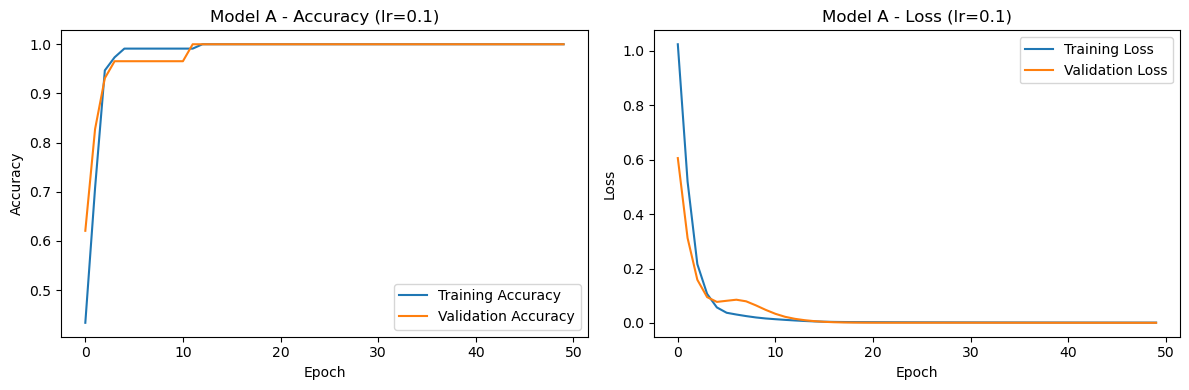

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.3033 - loss: 1.2117 - val_accuracy: 0.3793 - val_loss: 1.0621
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4245 - loss: 1.0464 - val_accuracy: 0.4828 - val_loss: 0.9315
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5372 - loss: 0.9009 - val_accuracy: 0.5862 - val_loss: 0.8112
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6330 - loss: 0.7732 - val_accuracy: 0.7586 - val_loss: 0.7069
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7932 - loss: 0.6644 - val_accuracy: 0.8276 - val_loss: 0.6199
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8498 - loss: 0.5763 - val_accuracy: 0.8621 - val_loss: 0.5477
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8911 - loss: 0.5057 - val_accuracy: 0.8621 - val_loss: 0.4887
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9348 - loss: 0.4475 - val_accuracy: 0.8621 - val_loss: 0.4388


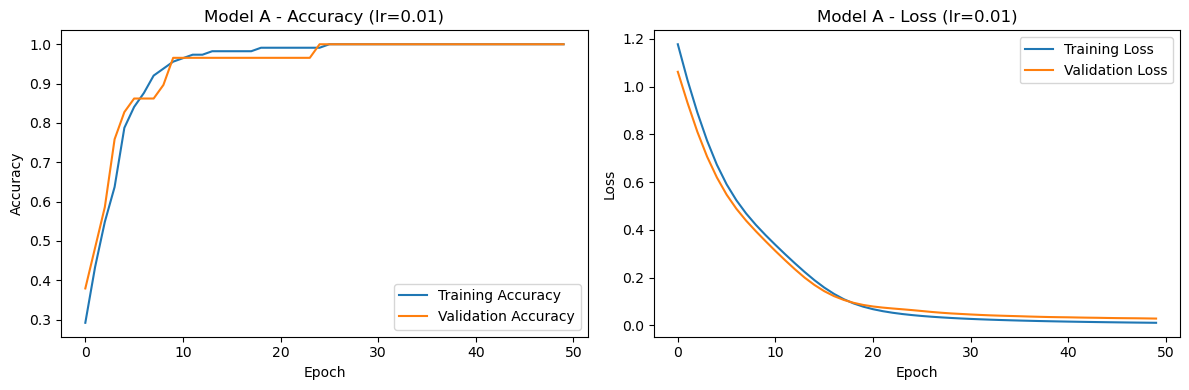

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.5830 - loss: 0.8883 - val_accuracy: 0.8276 - val_loss: 0.7508
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6530 - loss: 0.8713 - val_accuracy: 0.8276 - val_loss: 0.7399
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6824 - loss: 0.8556 - val_accuracy: 0.8621 - val_loss: 0.7291
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6880 - loss: 0.8404 - val_accuracy: 0.8621 - val_loss: 0.7186
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7030 - loss: 0.8258 - val_accuracy: 0.8621 - val_loss: 0.7084
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7267 - loss: 0.8117 - val_accuracy: 0.8621 - val_loss: 0.6986
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7417 - loss: 0.7982 - val_accuracy: 0.9310 - val_loss: 0.6887
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7417 - loss: 0.7851 - val_accuracy: 0.9310 - val_loss: 0.6788

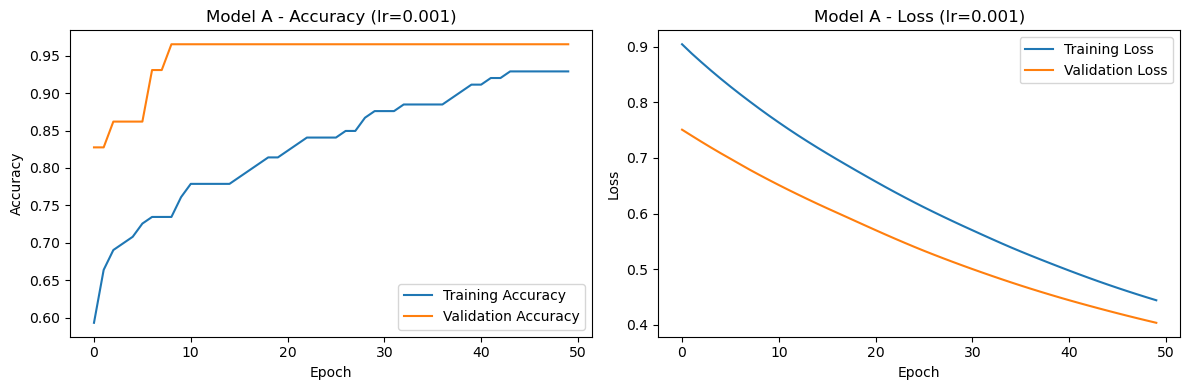

In [5]:
# TODO: Train Model A with different learning rates
learning_rates = [0.1, 0.01, 0.001]
results_a = []

for lr in learning_rates:
    model_a = create_model_a()
    history, loss, acc = train_and_evaluate(model_a, lr, X_train_scaled, y_train_cat, X_test_scaled, y_test_cat)
    results_a.append((lr, history, loss, acc))
    
    # Plot training history
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model A - Accuracy (lr={lr})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model A - Loss (lr={lr})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

### Experiment with Model B

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.3239 - loss: 1.1057 - val_accuracy: 0.6552 - val_loss: 0.6935
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7111 - loss: 0.6140 - val_accuracy: 0.7241 - val_loss: 0.5383
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7421 - loss: 0.5468 - val_accuracy: 0.8966 - val_loss: 0.3760
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9231 - loss: 0.3295 - val_accuracy: 0.9655 - val_loss: 0.3080
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9381 - loss: 0.2270 - val_accuracy: 0.9655 - val_loss: 0.2015
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9856 - loss: 0.1158 - val_accuracy: 0.9655 - val_loss: 0.1772
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9856 - loss: 0.0701 - val_accuracy: 0.9655 - val_loss: 0.1491
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.0400 - val_accuracy: 0.9655 - val_loss: 0.1277

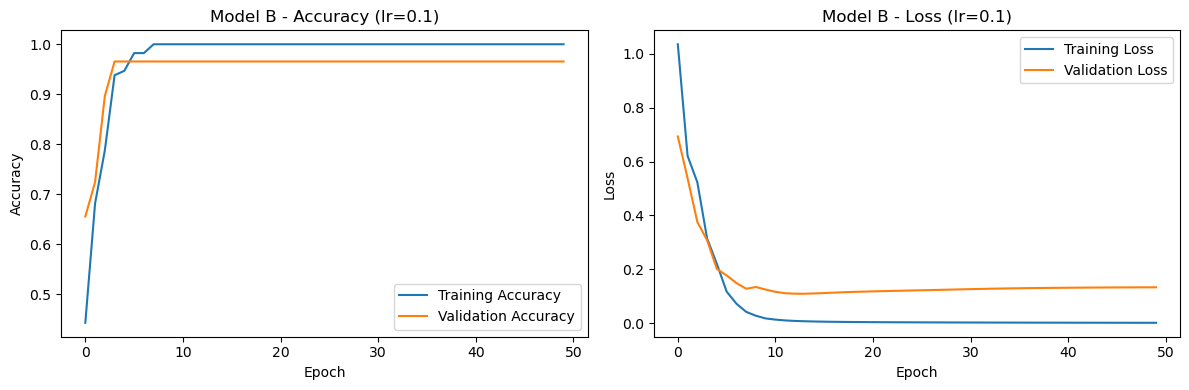

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.1325 - loss: 1.2801 - val_accuracy: 0.4483 - val_loss: 1.0612
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4074 - loss: 1.0242 - val_accuracy: 0.5517 - val_loss: 0.9533
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5692 - loss: 0.9307 - val_accuracy: 0.5517 - val_loss: 0.9167
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6142 - loss: 0.8714 - val_accuracy: 0.5862 - val_loss: 0.8991
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6328 - loss: 0.8205 - val_accuracy: 0.6207 - val_loss: 0.8769
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6415 - loss: 0.7778 - val_accuracy: 0.6207 - val_loss: 0.8412
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6415 - loss: 0.7408 - val_accuracy: 0.6207 - val_loss: 0.8005
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6447 - loss: 0.7034 - val_accuracy: 0.6207 - val_loss: 0.7539

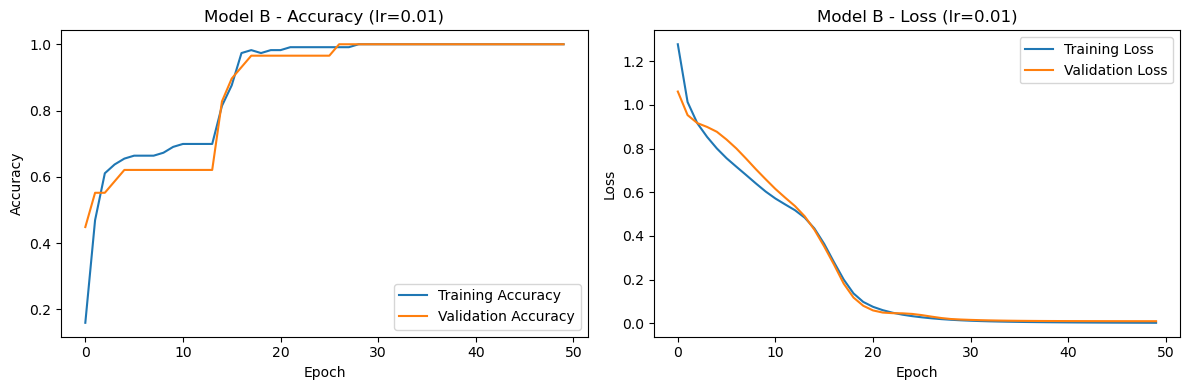

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 195ms/step - accuracy: 0.2966 - loss: 1.0985 - val_accuracy: 0.3448 - val_loss: 1.1769
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3441 - loss: 1.0810 - val_accuracy: 0.3448 - val_loss: 1.1553
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3882 - loss: 1.0654 - val_accuracy: 0.3793 - val_loss: 1.1346
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3939 - loss: 1.0503 - val_accuracy: 0.3793 - val_loss: 1.1148
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4268 - loss: 1.0357 - val_accuracy: 0.3793 - val_loss: 1.0961
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4505 - loss: 1.0214 - val_accuracy: 0.3793 - val_loss: 1.0786
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4653 - loss: 1.0076 - val_accuracy: 0.4138 - val_loss: 1.0618
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4566 - loss: 0.9942 - val_accuracy: 0.4828 - val_loss: 1.0459

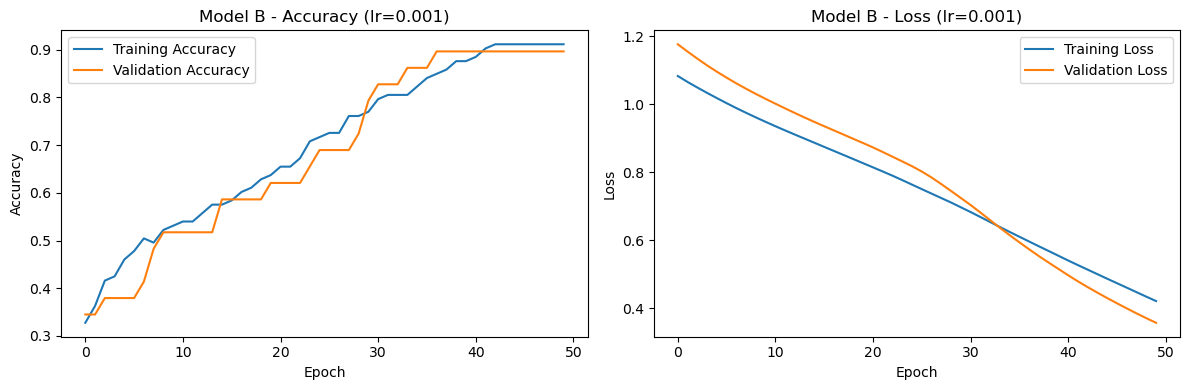

In [6]:
# TODO: Train Model B with different learning rates


learning_rates = [0.1, 0.01, 0.001]
results_b = []

for lr in learning_rates:
    model_b = create_model_b()
    history, loss, acc = train_and_evaluate(
        model_b, lr,
        X_train_scaled, y_train_cat,
        X_test_scaled, y_test_cat
    )
    results_b.append((lr, history, loss, acc))
    
    # Plot training history
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model B - Accuracy (lr={lr})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model B - Loss (lr={lr})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()


### Experiment with Model C

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.5609 - loss: 1.2633 - val_accuracy: 1.0000 - val_loss: 0.0753
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9763 - loss: 0.0860 - val_accuracy: 0.9655 - val_loss: 0.0657
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9913 - loss: 0.0331 - val_accuracy: 0.9655 - val_loss: 0.1735
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9913 - loss: 0.0189 - val_accuracy: 0.9655 - val_loss: 0.0651
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 2.2224e-04
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 7.7206e-04 - val_accuracy: 1.0000 - val_loss: 1.7438e-04
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 4.3066e-04 - val_accuracy: 1.0000 - 

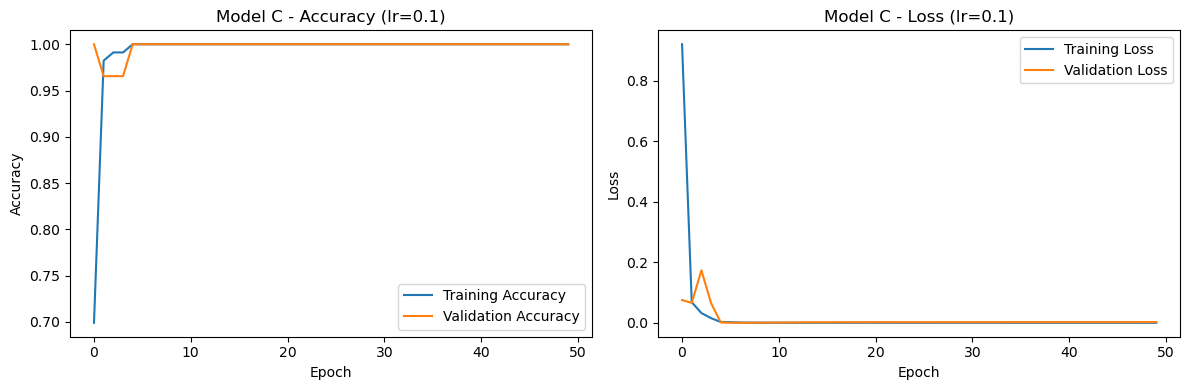

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.5847 - loss: 0.8745 - val_accuracy: 0.8966 - val_loss: 0.5654
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8940 - loss: 0.5051 - val_accuracy: 0.8966 - val_loss: 0.3389
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9475 - loss: 0.3114 - val_accuracy: 0.8966 - val_loss: 0.2282
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9475 - loss: 0.2053 - val_accuracy: 0.9655 - val_loss: 0.1686
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9713 - loss: 0.1442 - val_accuracy: 0.9655 - val_loss: 0.1369
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9856 - loss: 0.1071 - val_accuracy: 0.9655 - val_loss: 0.1167
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9913 - loss: 0.0827 - val_accuracy: 0.9655 - val_loss: 0.1049
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9913 - loss: 0.0662 - val_accuracy: 0.9655 - val_loss: 0.0986

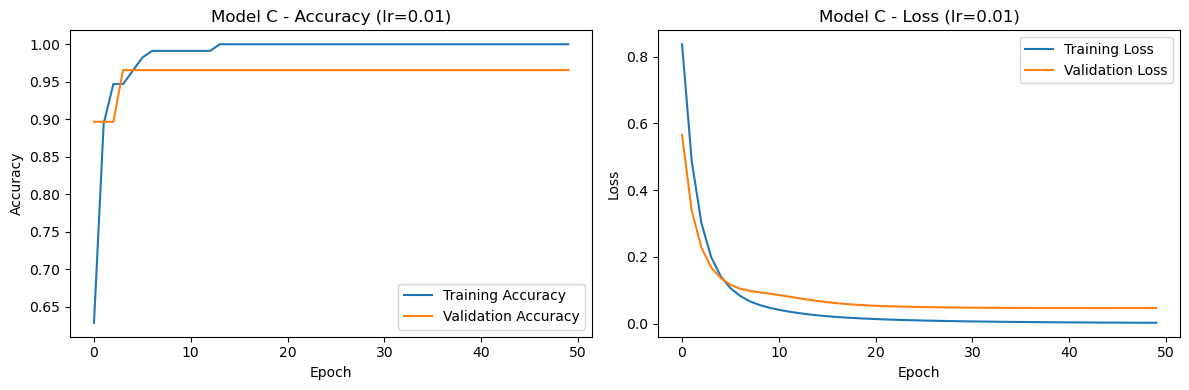

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.1252 - loss: 1.9200 - val_accuracy: 0.1379 - val_loss: 1.7519
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.1308 - loss: 1.8233 - val_accuracy: 0.1724 - val_loss: 1.6751
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.1364 - loss: 1.7336 - val_accuracy: 0.2069 - val_loss: 1.6024
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.1658 - loss: 1.6491 - val_accuracy: 0.2069 - val_loss: 1.5347
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.1966 - loss: 1.5697 - val_accuracy: 0.2414 - val_loss: 1.4709
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.2022 - loss: 1.4949 - val_accuracy: 0.2414 - val_loss: 1.4086
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.2079 - loss: 1.4251 - val_accuracy: 0.2759 - val_loss: 1.3500
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.2289 - loss: 1.3602 - val_accuracy: 0.2759 - val_loss: 1.2950

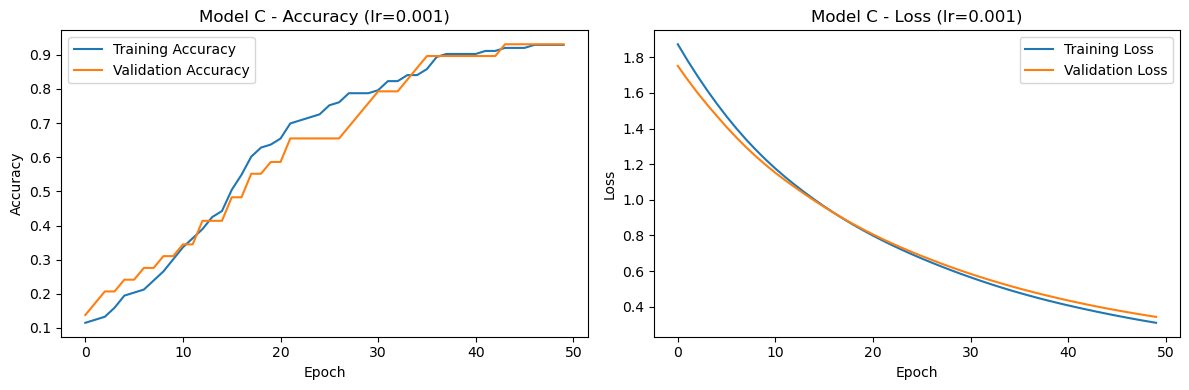

In [7]:
# TODO: Train Model C with different learning rates

learning_rates = [0.1, 0.01, 0.001]
results_c = []

for lr in learning_rates:
    model_c = create_model_c()
    history, loss, acc = train_and_evaluate(
        model_c, lr,
        X_train_scaled, y_train_cat,
        X_test_scaled, y_test_cat
    )
    results_c.append((lr, history, loss, acc))
    
    # Plot training history
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model C - Accuracy (lr={lr})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model C - Loss (lr={lr})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()


## Task 3: Hyperparameter Comparison Table (20 points)

In [8]:
# Create a comparison table
accuracy = [result[3] for result in results_a + results_b + results_c]
results = {
    'Model': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C'],
    'Hidden Layers': [1, 1, 1, 2, 2, 2, 1, 1, 1],
    'Neurons': ['[4]', '[4]', '[4]', '[8,4]', '[8,4]', '[8,4]', '[16]', '[16]', '[16]'],
    'Learning Rate': [0.1, 0.01, 0.001, 0.1, 0.01, 0.001, 0.1, 0.01, 0.001],
    'Test Accuracy': accuracy
}

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))

Model  Hidden Layers Neurons  Learning Rate  Test Accuracy
    A              1     [4]          0.100       1.000000
    A              1     [4]          0.010       1.000000
    A              1     [4]          0.001       0.972222
    B              2   [8,4]          0.100       1.000000
    B              2   [8,4]          0.010       1.000000
    B              2   [8,4]          0.001       0.972222
    C              1    [16]          0.100       1.000000
    C              1    [16]          0.010       1.000000
    C              1    [16]          0.001       0.944444


## Task 4: Analysis Questions (10 points)

Answer the following questions based on your experiments:

1. Which architecture performed best? Why?

Answer: Model C outperformed Models A and B because it offered a strong balance of capacity and simplicity.Model C uses a single hidden layer with 16 neurons, which gives it more capacity to learn patterns without the added complexity of a deep network.

2. How did learning rate affect training?

Answer: The learning rate significantly impacts model training by controlling how quickly the model updates its weights. A high learning rate can lead to unstable training, causing the model to overshoot optimal values and preventing convergence. In contrast, a low learning rate results in slow learning and may cause the model to get stuck in local minima or underfit the data. The ideal learning rate strikes a balance, allowing the model to converge efficiently and accurately. In practice, testing multiple values (e.g., 0.001, 0.01, 0.1) helps identify the sweet spot for best performance.

3. What is the impact of adding more neurons?

Answer: Adding more neurons to a neural network increases its capacity to learn complex patterns in the data.

4. Which activation function would you try next?

Answer:If I were to try a different activation function next, I would consider using Leaky ReLU, ELU, or Swish. While ReLU is simple and effective, it can cause some neurons to become inactive during training—a problem that Leaky ReLU helps address by allowing a small gradient when inputs are negative. ELU offers smoother outputs and can lead to faster convergence, while Swish, developed by Google, has shown strong performance in deeper networks due to its smooth, non-monotonic nature. Trying these alternatives can help improve learning dynamics and overall model performance.